Customer Churn Analysis

In [1]:
import pandas as pd
import numpy as np
from dataprep.eda import plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC

NumExpr defaulting to 4 threads.


TASK-1

In [2]:
#loading the Dataset 
data=pd.read_csv("churn_dataset.csv", delimiter=',', index_col = False)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Structure of the dataset
print(data.shape)

(7043, 21)


In [4]:
#Checking for Null values in the dataset
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Exploratory Data Analysis (EDA) using dataprep
plot(data)

In [6]:
# From EDA we can see that the 'TotalCharges' feature column has few row values unspecified types
np.unique(data.TotalCharges.values)

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [7]:
# Replacing the empty spaces with Null types
data = data.replace(r'^\s*$', np.nan, regex=True)

In [8]:
#Examining the missing values amd displaying the percentage of null values in each feature column

feature_names= list(data)
for i in feature_names:
    null_values = data[i].isnull().sum()
    nrow = data[i].count()
    missing_value_percent = (null_values/nrow)*100
    print(i +" " + ":" + " " + "Null_value_Percentage" + "=" + str(missing_value_percent) + "%","\n")
 

customerID : Null_value_Percentage=0.0% 

gender : Null_value_Percentage=0.0% 

SeniorCitizen : Null_value_Percentage=0.0% 

Partner : Null_value_Percentage=0.0% 

Dependents : Null_value_Percentage=0.0% 

tenure : Null_value_Percentage=0.0% 

PhoneService : Null_value_Percentage=0.0% 

MultipleLines : Null_value_Percentage=0.0% 

InternetService : Null_value_Percentage=0.0% 

OnlineSecurity : Null_value_Percentage=0.0% 

OnlineBackup : Null_value_Percentage=0.0% 

DeviceProtection : Null_value_Percentage=0.0% 

TechSupport : Null_value_Percentage=0.0% 

StreamingTV : Null_value_Percentage=0.0% 

StreamingMovies : Null_value_Percentage=0.0% 

Contract : Null_value_Percentage=0.0% 

PaperlessBilling : Null_value_Percentage=0.0% 

PaymentMethod : Null_value_Percentage=0.0% 

MonthlyCharges : Null_value_Percentage=0.0% 

TotalCharges : Null_value_Percentage=0.15642775881683732% 

Churn : Null_value_Percentage=0.0% 



In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [10]:
#Converting the column type for TotalCharges to Float types
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [11]:
#Checking the statistics of the column to decide wether to replace the missing value or drop the rows
data['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

shape: (7032, 21) 

['Yes', 'No'] [1869, 5163]


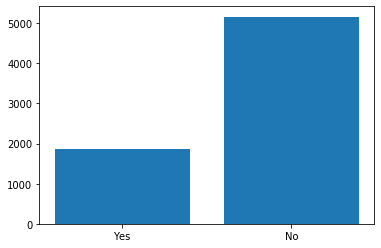

In [12]:
#Checking the Target feature 'Churn' after dropping the rows with missing values
data = data.dropna()
print("shape:",data.shape,"\n")
churn_list=['Yes','No']
Y = (data['Churn']=='Yes').sum()
N = (data['Churn']=='No').sum()
Heights=[Y,N]
print(churn_list,Heights)
plt.bar(churn_list, Heights);

TASK-2

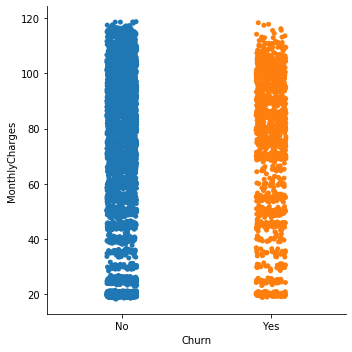

In [13]:
sns.catplot(x='Churn',y='MonthlyCharges', data=data)

People who did churn had a high monthly charges greater than around 60.

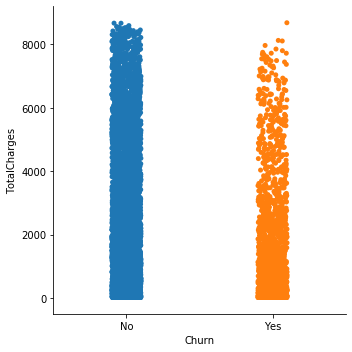

In [14]:
sns.catplot(x='Churn', y='TotalCharges', data= data)

People who opted to churn had a low Total charges. While people who stayed and did not churn had higher Total charges.

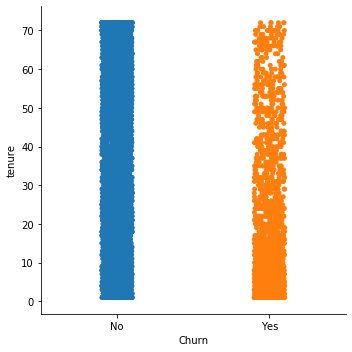

In [15]:
sns.catplot(x='Churn', y='tenure', data=data)

Maximum of people who have churned out left early or remained for short period of time

In [16]:
#resetting the index so that there wont be any prob while merging different dataframes
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

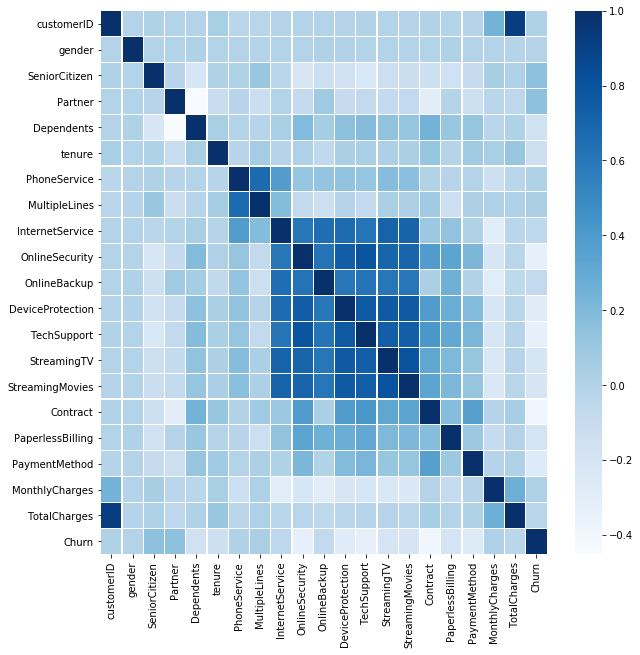

In [17]:
#Correlation matrix for all the features
plt.figure(figsize=(10,10))
corr_mat = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, linewidths=.2, cmap='Blues')

TotalCharges shows a very high correlation with customerID. We can drop customerID hence. Also it does not seem to be a important feature for the model. 

In [18]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
#Converting the 'Churn' feature values to 0(No) and 1(Yes) 
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [20]:
# Label encoding for Gender feature
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

#label encoding for other binary feature columns having Yes/No
B_list = ['Partner','Dependents','PhoneService','PaperlessBilling']
data[B_list] = data[B_list].replace({'Yes':1, 'No':0})

In [21]:
# One Hot Encoding for Categorical List(Having more than two options)

cat_list = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
            'StreamingTV', 'StreamingMovies','Contract','PaymentMethod']
cat_onehotenc = pd.get_dummies(data[cat_list])

In [22]:
# Scaling of the Numeric columns using MinMax Scaling
num_list = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_list = pd.DataFrame(data=scaler.fit_transform(data[num_list]), columns = num_list)

    
    
    

In [23]:
scaled_list

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7027,0.323944,0.662189,0.227521
7028,1.000000,0.845274,0.847461
7029,0.140845,0.112935,0.037809
7030,0.042254,0.558706,0.033210


In [24]:
data1 = data.drop(columns=cat_list)
data1 = data1.drop(columns=num_list)
# merging the dataframes
data2 = pd.concat([data1, scaled_list, cat_onehotenc], axis=1)

In [25]:
data_fin = data2.drop(columns='customerID')
data_fin

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0.000000,0.115423,0.001275,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0.464789,0.385075,0.215867,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,1,1,0.014085,0.354229,0.010310,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0.619718,0.239303,0.210241,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,1,1,0.014085,0.521891,0.015330,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,1,0,0.323944,0.662189,0.227521,...,0,0,1,0,1,0,0,0,0,1
7028,0,0,1,1,1,1,0,1.000000,0.845274,0.847461,...,0,0,1,0,1,0,0,1,0,0
7029,0,0,1,1,0,1,0,0.140845,0.112935,0.037809,...,1,0,0,1,0,0,0,0,1,0
7030,1,1,1,0,1,1,1,0.042254,0.558706,0.033210,...,1,0,0,1,0,0,0,0,0,1


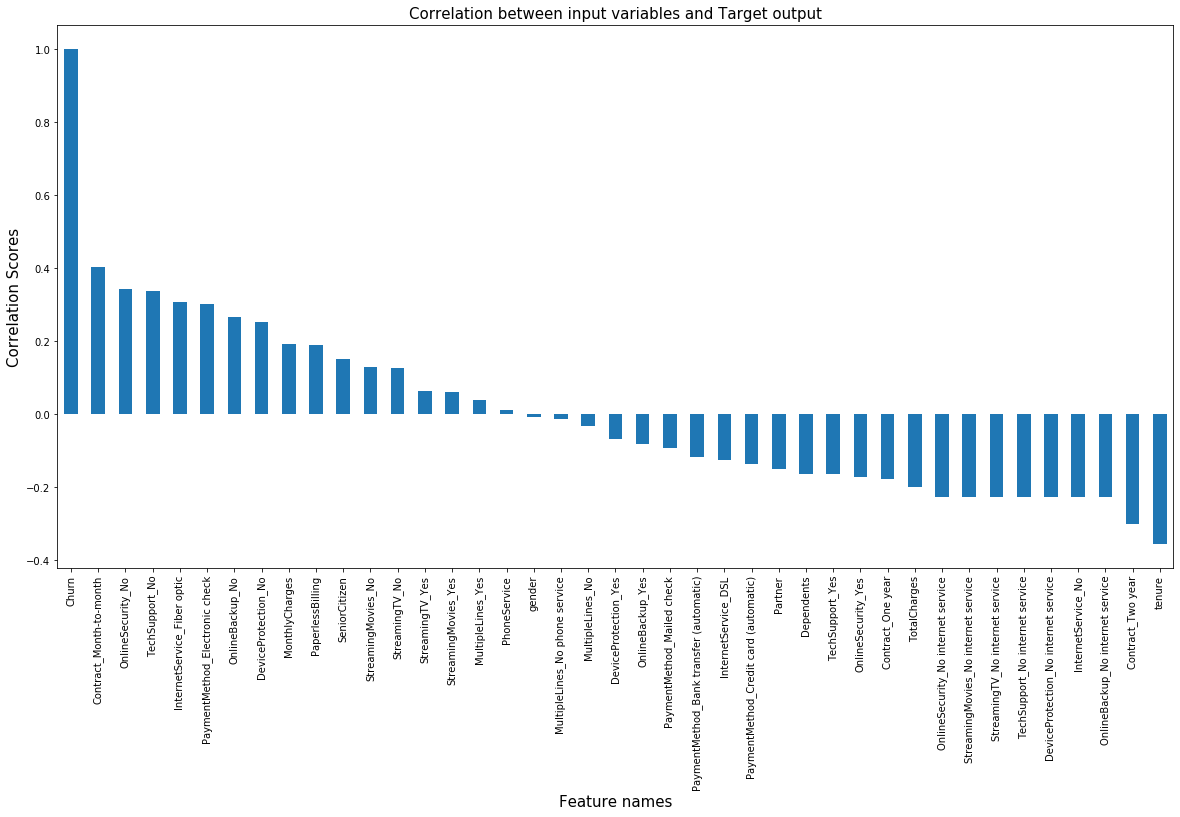

In [26]:
#Plotting the Bar Plot to show the correlations between input variables and target output 'Churn'
plt.figure(figsize=(20,10))
ax = data_fin.corr()['Churn'].sort_values(ascending = False)
ax.plot(kind='bar')
plt.title('Correlation between input variables and Target output', fontsize=15)
plt.xlabel("Feature names", fontsize=15)
plt.ylabel("Correlation Scores", fontsize=15)          
plt.xticks(rotation=90);

In [27]:
X = data_fin.drop(columns='Churn')
y = data_fin['Churn']


Feature Selection

In [28]:
#using Chi-square test to get the feature scores
best_features = SelectKBest(score_func=chi2, k=40)
fit = best_features.fit(X,y)

In [29]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['features','Score'] 

In [30]:
featureScores.sort_values(by ='Score', ascending=False)

,features,Score
33,Contract_Month-to-month,516.714004
35,Contract_Two year,486.223101
38,PaymentMethod_Electronic check,424.113152
15,OnlineSecurity_No,414.036636
24,TechSupport_No,404.010811
13,InternetService_Fiber optic,372.082851
16,OnlineSecurity_No internet service,285.475152
28,StreamingTV_No internet service,285.475152
22,DeviceProtection_No internet service,285.475152
19,OnlineBackup_No internet service,285.475152


In [31]:
#Using ExtraTreesClassifier to get the feature importance
etc_model = ExtraTreesClassifier(random_state=42)
etc_model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

In [32]:
print(etc_model.feature_importances_)

[0.03715221 0.02722346 0.03201548 0.02524744 0.00386126 0.03092257
 0.12777237 0.11927045 0.14127183 0.01471257 0.00380294 0.01398635
 0.01465986 0.02271412 0.00173886 0.02670601 0.00397545 0.01294916
 0.02017462 0.00140645 0.01336456 0.01884183 0.00240914 0.01351026
 0.02908785 0.00211001 0.01237343 0.01254993 0.00207353 0.01300963
 0.01246988 0.00255224 0.01321625 0.06605424 0.01406215 0.02006363
 0.01292704 0.0142828  0.03119092 0.01228723]


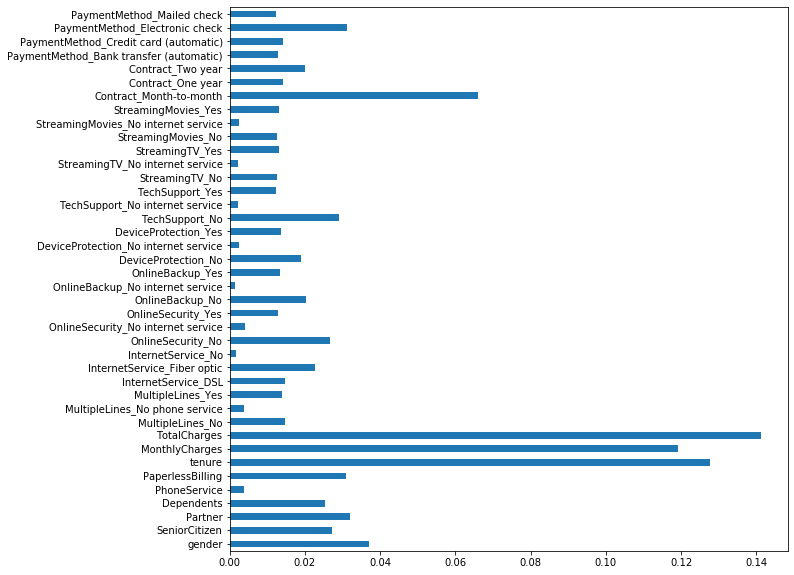

In [33]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(etc_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,10))
feat_importances.plot(kind='barh')
plt.show()

Using Extra Tree Classifier for feature importance did not yield good results when compared with previously drawn correlation matrix and correlation score barplot. Here 'gender' feature is shown to be important but it did not reflect in the barplot. So checking for feature importance through Correlation matrix( for Independent features) and by implementing Recursive Feature elimination method.

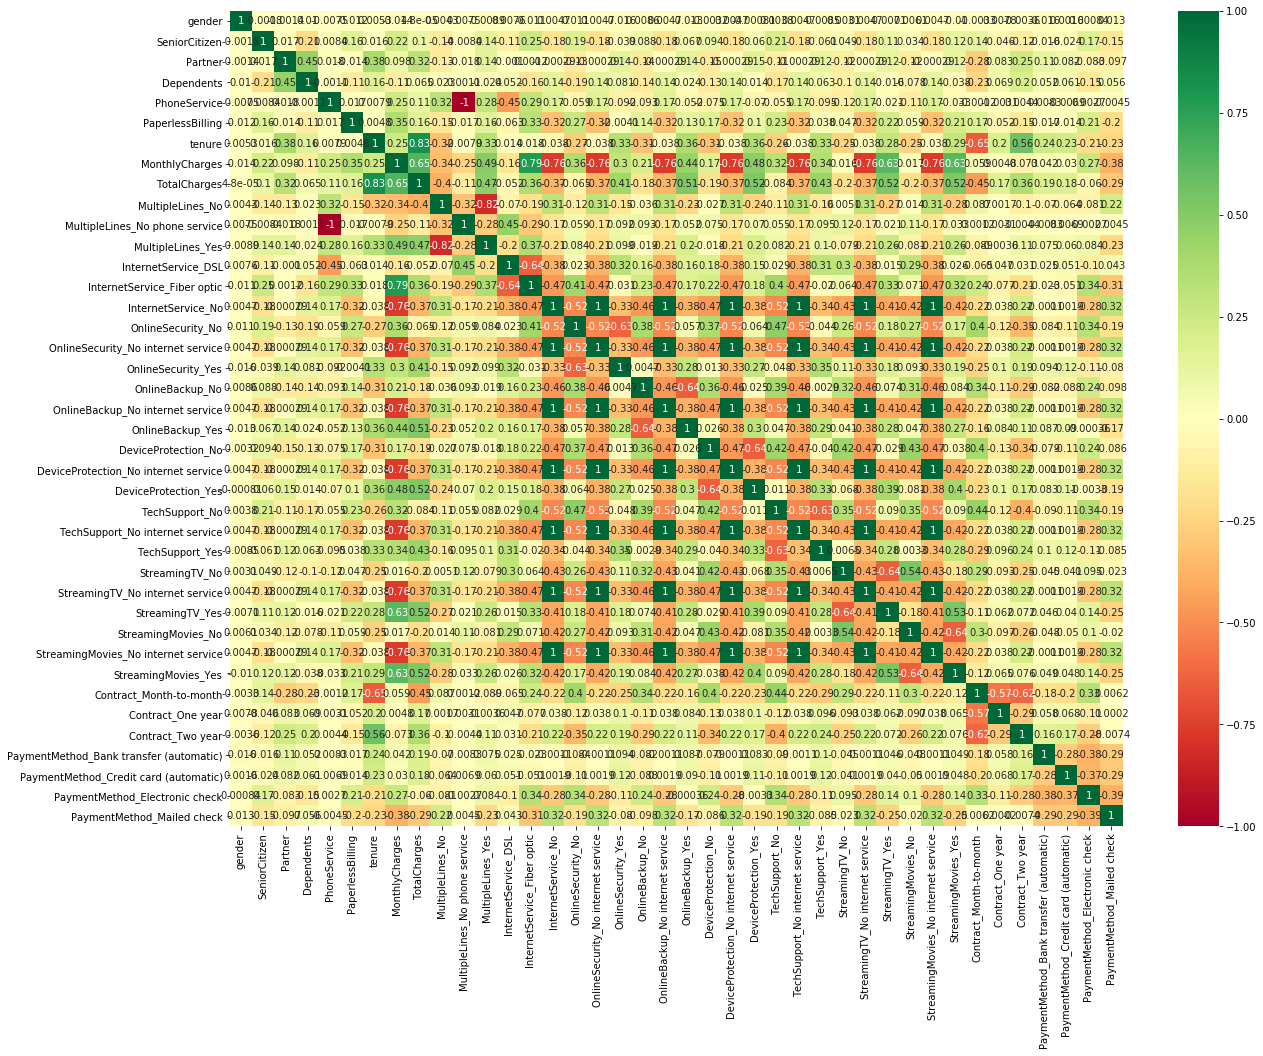

In [34]:
#Checking for Multicollinearity between the feature variables
corr_matrix = X.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(20,15))
#plot heat map
sns.heatmap(X[corr_features].corr(),annot=True,cmap="RdYlGn");

In [35]:
# Using Recursive Feature Elimination method for finding the best combination of features

#using Logistic Regression and using L2 regularization as penalty 
estimator = LogisticRegression(penalty='l2',solver='lbfgs',max_iter=1000)

# using the n_features_to_select as default
rfe = RFE(estimator,step=1)
rfe_fit=rfe.fit(X,y)

In [36]:
rfe_fit.support_

array([False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False,  True, False])

In [37]:
#Total features selected by RFE method
rfe_fit.n_features_

20

In [38]:
df1_features = pd.DataFrame(rfe_fit.support_)
df1_columns = pd.DataFrame(X.columns)
df1_ranks = pd.DataFrame(rfe_fit.ranking_)
featureScores_rfe = pd.concat([df1_columns,df1_features,df1_ranks],axis=1)
featureScores_rfe.columns = ['features','Support', 'Ranking'] 

In [39]:
#Showing the strength of all the features 
featureScores_rfe 

,features,Support,Ranking
0,gender,False,18
1,SeniorCitizen,True,1
2,Partner,False,20
3,Dependents,True,1
4,PhoneService,True,1
5,PaperlessBilling,True,1
6,tenure,True,1
7,MonthlyCharges,True,1
8,TotalCharges,True,1
9,MultipleLines_No,True,1


In [40]:
#Selecting only those features where it is marked True in the Support column and the Ranking is 1
rfe_fea = featureScores_rfe[featureScores_rfe['Support']]

In [41]:
rfe_fea

,features,Support,Ranking
1,SeniorCitizen,True,1
3,Dependents,True,1
4,PhoneService,True,1
5,PaperlessBilling,True,1
6,tenure,True,1
7,MonthlyCharges,True,1
8,TotalCharges,True,1
9,MultipleLines_No,True,1
12,InternetService_DSL,True,1
13,InternetService_Fiber optic,True,1


In [42]:
#comparing with the top 20 features scores that we got by using SelectKBest

featureScores.nlargest(20,'Score').sort_values(by ='Score', ascending=False)

,features,Score
33,Contract_Month-to-month,516.714004
35,Contract_Two year,486.223101
38,PaymentMethod_Electronic check,424.113152
15,OnlineSecurity_No,414.036636
24,TechSupport_No,404.010811
13,InternetService_Fiber optic,372.082851
22,DeviceProtection_No internet service,285.475152
31,StreamingMovies_No internet service,285.475152
28,StreamingTV_No internet service,285.475152
25,TechSupport_No internet service,285.475152


We find that 7 features in the table show above have the same score which can be explained by the multicollinearity between the features that can be seen in the Correlation Matrix above. Hence selecting the top 26 features and checking

In [43]:
featureScores.nlargest(26,'Score').sort_values(by ='Score', ascending=False)

,features,Score
33,Contract_Month-to-month,516.714004
35,Contract_Two year,486.223101
38,PaymentMethod_Electronic check,424.113152
15,OnlineSecurity_No,414.036636
24,TechSupport_No,404.010811
13,InternetService_Fiber optic,372.082851
14,InternetService_No,285.475152
16,OnlineSecurity_No internet service,285.475152
19,OnlineBackup_No internet service,285.475152
22,DeviceProtection_No internet service,285.475152


##

Comparing between the above two tables of features from RFE and SelectKBest, we find that most of the features are common in both the tables. There are some features which are not matching in both the tables. However from the correlation matrix we find that there are many features which are related to each other. So one feature can be represented by other and hence can be dropped. For ex. 'StreamingMovies_No internet service' feature has very strong positive correlation with features like 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service'.

so I am proceeding by Choosing the 20 features as given by the RFE method 



In [44]:
fea_final = list(rfe_fea['features'])
X1 = X[fea_final]

In [45]:
X1

,SeniorCitizen,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No,StreamingTV_Yes,StreamingMovies_Yes,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
0,0,0,0,1,0.000000,0.115423,0.001275,0,1,0,1,0,0,0,1,0,0,1,0,1
1,0,0,1,0,0.464789,0.385075,0.215867,1,1,0,0,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0.014085,0.354229,0.010310,1,1,0,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0.619718,0.239303,0.210241,0,1,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,1,0.014085,0.521891,0.015330,1,0,1,1,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,1,1,0.323944,0.662189,0.227521,0,1,0,0,1,0,0,0,1,1,0,0,0
7028,0,1,1,1,1.000000,0.845274,0.847461,0,0,1,1,0,0,0,1,1,1,0,0,0
7029,0,1,0,1,0.140845,0.112935,0.037809,0,1,0,0,1,0,0,1,0,0,1,0,1
7030,1,0,1,1,0.042254,0.558706,0.033210,0,0,1,1,1,0,0,1,0,0,1,0,0


TASK-3

In [46]:
#split the dataset into train set (80%) and test set (20%)
# l=len(X1)
# split=int(l*0.8) 
# X_train, X_test=X1[:split], X1[split:]
# y_train, y_test=y[:split], y[split:]

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

#converting the pandas dataframes into numpy matrices
X_train, X_test=np.array(X_train), np.array(X_test)
y_train, y_test=np.array(y_train), np.array(y_test)


In [47]:
#Fitting a Logistic Regression model
lr_model = LogisticRegression(random_state=818,solver='lbfgs') 
lr_model.fit(X_train,y_train) 
lr_y_pred=lr_model.predict_proba(X_test)

In [48]:
lr_score = roc_auc_score(y_true=y_test, y_score = lr_y_pred[:,1])
print("AUC Score:",lr_score)

AUC Score: 0.8385443047689214


In [49]:
#Printing the Classification report
print(classification_report(y_test,lr_y_pred[:,1].round()))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1026
           1       0.67      0.53      0.59       381

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [50]:
#printing the confusion matrix
confusion_matrix_lr = confusion_matrix(y_test, lr_y_pred[:,1].round())
print("Confusion matrix for Logistic Regression:\n%s" % confusion_matrix_lr)

Confusion matrix for Logistic Regression:
[[925 101]
 [178 203]]


In [51]:
#Decision Trees Model
tree=DecisionTreeClassifier(random_state=70)
tree.fit(X_train,y_train)
tree_y_pred=tree.predict_proba(X_test)

In [52]:
tree_score=roc_auc_score(y_true=y_test,y_score=tree_y_pred[:,1])
print("AUC Score:", tree_score)

AUC Score: 0.659609982962656


The score is low compared to the above Logistic regression model. we can change max_depth and check. Above the max-depth is set to default. Setting to max_depth=5 and checking

In [53]:
#taking max_depth=5 for the DecisionTreeClassifier Model 
tree=DecisionTreeClassifier(max_depth=5, random_state=70)
tree.fit(X_train,y_train)
tree_y_pred=tree.predict_proba(X_test)
tree_score=roc_auc_score(y_true=y_test,y_score=tree_y_pred[:,1])
print("AUC Score:", tree_score)

AUC Score: 0.8344422955902442


In [54]:
print(classification_report(y_test,tree_y_pred[:,1].round()))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1026
           1       0.63      0.53      0.58       381

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [55]:
#printing the confusion matrix
confusion_matrix_tree = confusion_matrix(y_test, tree_y_pred[:,1].round())
print("Confusion matrix for Decision Trees Model :\n%s" % confusion_matrix_tree)

Confusion matrix for Decision Trees Model :
[[909 117]
 [179 202]]


In [56]:
# RandomForestClassifier
for_clf = RandomForestClassifier(random_state=10)
for_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [57]:
forest_y_pred=for_clf.predict_proba(X_test)
forest_score=roc_auc_score(y_true=y_test,y_score=forest_y_pred[:,1])
print("AUC Score:", tree_score)

AUC Score: 0.8344422955902442


In [58]:
for_clf = RandomForestClassifier(max_depth=2, random_state=0)
for_clf.fit(X_train,y_train)
forest_y_pred=for_clf.predict_proba(X_test)
forest_score=roc_auc_score(y_true=y_test,y_score=forest_y_pred[:,1])
print("AUC Score:", tree_score)

AUC Score: 0.8344422955902442


In [59]:
print(classification_report(y_test,forest_y_pred[:,1].round()))

              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1026
           1       0.84      0.19      0.30       381

    accuracy                           0.77      1407
   macro avg       0.80      0.59      0.58      1407
weighted avg       0.78      0.77      0.71      1407



In [60]:
#printing the confusion matrix
confusion_matrix_forest = confusion_matrix(y_test, forest_y_pred[:,1].round())
print("Confusion matrix for Random Forest:\n%s" % confusion_matrix_forest)

Confusion matrix for Random Forest:
[[1012   14]
 [ 310   71]]


In [61]:
#Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_y_pred = gb.predict_proba(X_test)
gb_score = roc_auc_score(y_true = y_test,y_score = gb_y_pred[:,1])
print("AUC Score:", gb_score)

AUC Score: 0.8441556282072928


In [62]:
print(classification_report(y_test,gb_y_pred[:,1].round()))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.67      0.51      0.58       381

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [63]:
#printing the confusion matrix
confusion_matrix_gb = confusion_matrix(y_test, gb_y_pred[:,1].round())
print("Confusion matrix for Gradient Boostng:\n%s" % confusion_matrix_gb)

Confusion matrix for Gradient Boostng:
[[932  94]
 [186 195]]


In [64]:
#Support Vector Machines
clf= SVC(probability=True)
sv = clf.fit(X_train, y_train)
svm_y_pred = sv.predict_proba(X_test)
svm_score = roc_auc_score(y_true = y_test,y_score = svm_y_pred[:,1])
print("AUC Score:", svm_score)

AUC Score: 0.781441062557239


In [65]:
print(classification_report(y_test,svm_y_pred[:,1].round()))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1026
           1       0.72      0.46      0.56       381

    accuracy                           0.80      1407
   macro avg       0.77      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [66]:
#printing the confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, svm_y_pred[:,1].round())
print("Confusion matrix for SVM:\n%s" % confusion_matrix_svm)

Confusion matrix for SVM:
[[958  68]
 [207 174]]


##

From the above all models, Gradient Boosting model correctly classified the samples more times in comparison to other models. Also the number of samples misclassified by GBM is less. Even though the SVM classifier does well in correctly classifying the True Positives and True Negatives, AUC score for the Gradient boosting model is higher and GBM also has a good overall precision and Recall.

Selecting GB model for hyperparameter tuning. Previously all were set to defaults. I am now trying to find if the model can be improved by changing some of the parameters.


In [67]:
parameters = {
    "learning_rate": [0.01,0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5,3),
    "min_samples_leaf": np.linspace(0.1, 0.5,3),
    "max_depth":[2,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5,0.7, 1.0],
    "n_estimators":[10]
    }

In [68]:
clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

In [69]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [70]:
print(clf.best_params_)

{'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10, 'subsample': 1.0}


In [71]:
gb1 = GradientBoostingClassifier(learning_rate=0.2,n_estimators=10,max_depth=8,max_features='sqrt',min_samples_leaf=0.1,
                                 min_samples_split=0.1,subsample=1)
gb1.fit(X_train, y_train)
gb1_y_pred = gb1.predict_proba(X_test)
gb1_score = roc_auc_score(y_true = y_test,y_score = gb1_y_pred[:,1])
print("AUC Score:", gb_score)

AUC Score: 0.8441556282072928


In [74]:
#printing the confusion matrix
confusion_matrix_gb_hypertuned = confusion_matrix(y_test, gb1_y_pred[:,1].round())
print("Confusion matrix for GBM hypertuned:\n%s" % confusion_matrix_gb_hypertuned)

Confusion matrix for GBM hypertuned:
[[958  68]
 [221 160]]


In [75]:
print(classification_report(y_test,gb1_y_pred[:,1].round()))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1026
           1       0.70      0.42      0.53       381

    accuracy                           0.79      1407
   macro avg       0.76      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



After Hyper-tuning we are getting the same AUC score. May be the various Parameters choosen for GridSearchCV could have been increased and checked for better performance. Also we can choose to use the parameters for 'max_features' or criterion. Given more computational power it can be achieved to do the GridSearchCV in less time and much more efficiently. 

However from the confusion matrix we can see that the numbers of samples correctly classified have increased and likewise the number of samples falsely classified reduced, may be in very small terms. But still than shows the benefits of Hypertuning

If we look through the dataset available, For the feature column 'Churn', there is uneqal distribution of data for label 'Yes' and 'No'. To avoid the Target variable imbalance we can feed in more data to the model so that our model can train and learn the pattern for classifying Churn customer or Non Churn customer, much more efficiently. This could be done using 
SMOTE( synthetic minority Over-sampling Technique).

During selection of models, one more method that could be implemented was doing Kfold cross validation  and check the mean of scores(score from each fold in Cross Validation) for selecting the model. I choose the above way for checking the confusion matrix and classification report. 

Overall I hope i did some meaningful work to get the important features and build the model for classification. It was a good learning experience and I got to learn new things in the process of doing this assignment.